# Eksik Veri

## Hızlı Çözüm

In [1]:
import pandas as pd
import numpy as np

In [2]:
V1=np.array([1,3,6,np.NaN ,7, 1 , np.NaN, 9 , 15])
V2=np.array([7, np.NaN, 5, 8 ,12 , np.NaN,np.NaN,  2 ,3])
V3=np.array([np.NaN ,12,5,6,14 ,7, np.NaN,2 , 31])

df=pd.DataFrame({"V1":V1, 
                 "V2":V2, 
                 "V3":V3}
               )

df


,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [3]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [4]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

Toplam boş değere erişmek istenildiğinde arka arkaya 2 tane sum() konulur.

In [5]:
df.isnull().sum().sum() 

7

In [6]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


En az bir eksik değer barındıran satırlara erişililirken any axis  kullanırız.

In [7]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


Hepsi dolu olanları çağırırken.

In [8]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [9]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerlerin direkt silinmesi

In [10]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [11]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Kalıcı bir değişiklik için "inplace=True" kullanılır.

In [12]:
df.dropna(inplace=True)
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama

In [13]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
df["V1"]

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [15]:
df["V1"].mean()

9.25

Artık 3 ve 6. değerde ortalama olan 6 değeri var.

In [16]:
df["V1"].fillna(df["V1"].mean())

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

### Doldurma İşlemini Otomatik olarak Fonksiyonlar ile yapma

In [17]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


apply--> sütunlar üzerinde işlem yapılacak. Döngü yazmaya gerek yok.

her x değişkenini yakaladığında onu x değişkeninin ortalaması ile doldur.

axis=0 olunca da satırlara göre işlem yapılacak demek.


In [18]:
df.apply(lambda x : x.fillna(x.mean()) , axis=0)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Silme Yöntemleri

In [19]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


1. En az bir tane eksik değer bulunan satırları silme

In [20]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


2. Bütün değerleri eksik olanları silme 

In [21]:
df.dropna(how = "all")

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Değişkenler bazında silme işlemi

değişken bazında en az bir tane eksik değer olan değişkeni silmek.

In [22]:
df.dropna(axis=1)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Bütün değişkenleri boş olan sütunu silme işlemi:

In [23]:
df["sil_beni"]=np.nan

In [24]:
df

,V1,V2,V3,sil_beni
2,6.0,5.0,5.0,NaN
4,7.0,12.0,14.0,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [25]:
df.dropna(axis=1 , how="all" , inplace=True)
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Değer Atama Yöntemleri

#### Sayısal değişkenlerde atama

In [26]:
df["V1"].fillna(0)

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [27]:
df["V1"].fillna(df["V1"].mean())

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [28]:
# tüm değişkenler için 1.yol
df.apply(lambda x: x.fillna(x.mean()) , axis=0)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [29]:
#ikinci yol
df.fillna(df.mean()[:])

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [30]:
#üçüncü yol
df.where(pd.notna(df) ,df.mean() , axis="columns" )

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Kategorik Değişken Kırılımında Değer Atama

In [31]:
V1=np.array([1,3,6,np.NaN ,7, 1 , np.NaN, 9 , 15])
V2=np.array([7, np.NaN, 5, 8 ,12 , np.NaN,np.NaN,  2 ,3])
V3=np.array([np.NaN ,12,5,6,14 ,7, np.NaN,2 , 31])
V4=np.array(["IT" , "IT" , "IK" , "IK" , "IK" , "IK" , "IK","IT" , "IT" ])

df_maas=pd.DataFrame({"maas":V1, 
                 "V2":V2, 
                 "V3":V3,
                 "departman":V4}
               )

df_maas

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [32]:
df_maas.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [33]:
df_maas["maas"].fillna(df_maas.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

### Kategorik Değişkenlerde Değer Atama

In [34]:
V1=np.array([1,3,6,np.NaN ,7, 1 , np.NaN, 9 , 15])
V4=np.array(["IT" , np.nan , "IK" , "IK" , "IK" , "IK" , "IK","IT" , "IT" ] , dtype=object)

df_maaslar=pd.DataFrame({"maas":V1, 
                 "departman":V4}
               )

df_maaslar

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


kategorik değişkendeki eksiklikleri yok etmek için kullanılacak en iyi yol mod değişkenidir. Yani en çok tekrar edeni eklemek daha iyi olacaktır.

In [35]:
df_maaslar["departman"].fillna(df_maaslar["departman"].mode() [0], inplace=True)

In [36]:
df_maaslar["departman"].fillna(method= "bfill") #sonrakı değerle doldurma

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [37]:
df_maaslar["departman"].fillna(method= "ffill") #önceki değerle doldurma

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Tahmine Dayalı Değer Atama

In [38]:
import seaborn as sns
df_titanic = sns.load_dataset("titanic")
df_titanic = df_titanic.select_dtypes(include=["float64" , "int64"])
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [39]:
df_titanic.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [40]:
!pip install ycimpute

In [41]:
from ycimpute.imputer import knnimput

ModuleNotFoundError: No module named 'torch._C'

In [ ]:
var_names=list(df_titanic)

In [ ]:
n_df_titanic= np.array(df_titanic)

In [ ]:
n_df_titanic[0:10]

In [ ]:
n_df_titanic.shape

In [ ]:
dff=knnimput.KNN(k=4).complete(n_df_titanic)

In [ ]:
type(dff)

In [ ]:
dff=pd.DataFrame(dff, columns= var_names)

In [ ]:
dff.isnull().sum()

__Random Forests__

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic = df_titanic.select_dtypes(include=["float64" , "int64"])
df_titanic.head()

In [ ]:
df_titanic.isnull().sum()

In [ ]:
var_names=list(df_titanic)

In [ ]:
n_df=np.array(df_titanic)

In [ ]:
from ycimpute.imputer import iterforest
dff=iterforest.IterImput().complete(n_df)

In [ ]:
dff=pd.DataFrame(dff, columns= var_names)

In [ ]:
dff.isnull().sum()

__EM__

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic = df_titanic.select_dtypes(include=["float64" , "int64"])
df_titanic.head()

In [ ]:
from ycimpute.imputer import EM

In [ ]:
var_names=list(df_titanic)

In [ ]:
n_df_em=np.array(df_titanic)

In [ ]:
dff=EM().complete(n_df_em)

In [ ]:
dff=pd.DataFrame(dff, columns= var_names)

In [ ]:
dff.isnull().sum()

## Eksik Veri Yapısının Görselleştirilmesi

In [42]:
import missingno as msno

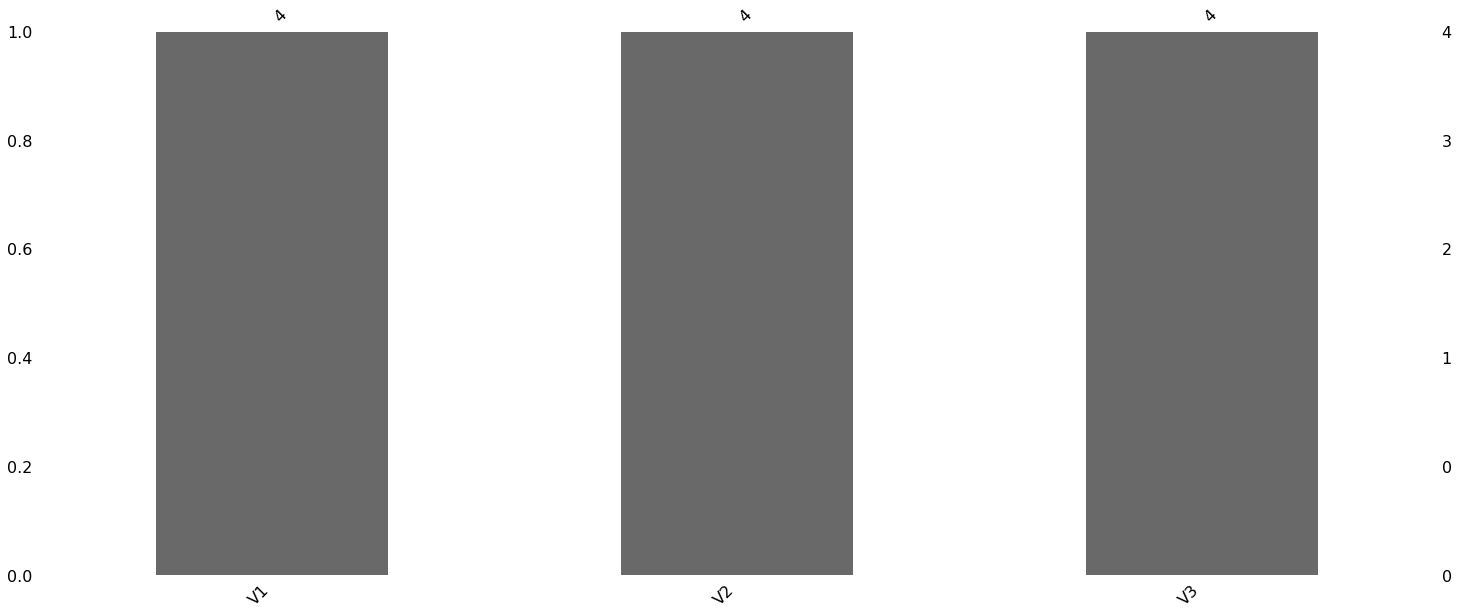

In [43]:
msno.bar(df);

  6.satırda hiçbir gözlemin dolu olmadığı görülüyor. sağdaki çizgide de 0 görülmekte. Ama 9. satırda ise 3 görülmekte.

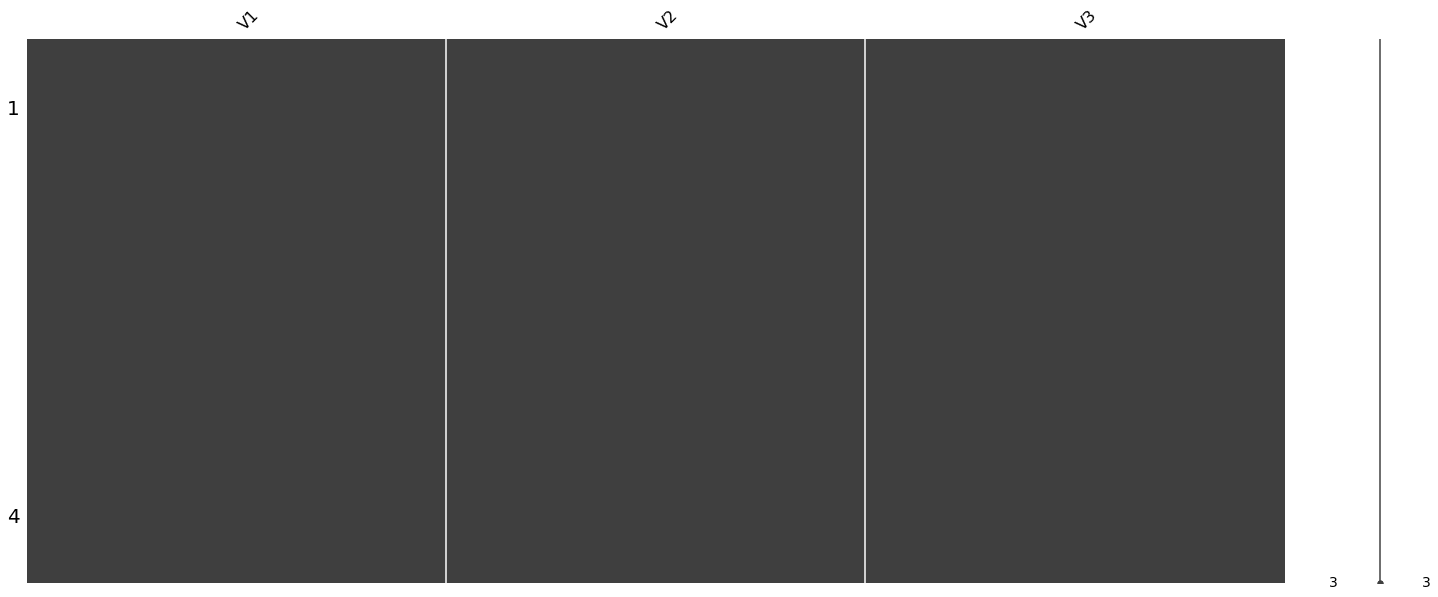

In [44]:
msno.matrix(df);

__Şimdi de başka bir veri seti üzerinden inceleme gerçekleştirelim__

In [45]:
import seaborn as sns

In [46]:
df_planets=sns.load_dataset("planets")
df_planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [47]:
df_planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

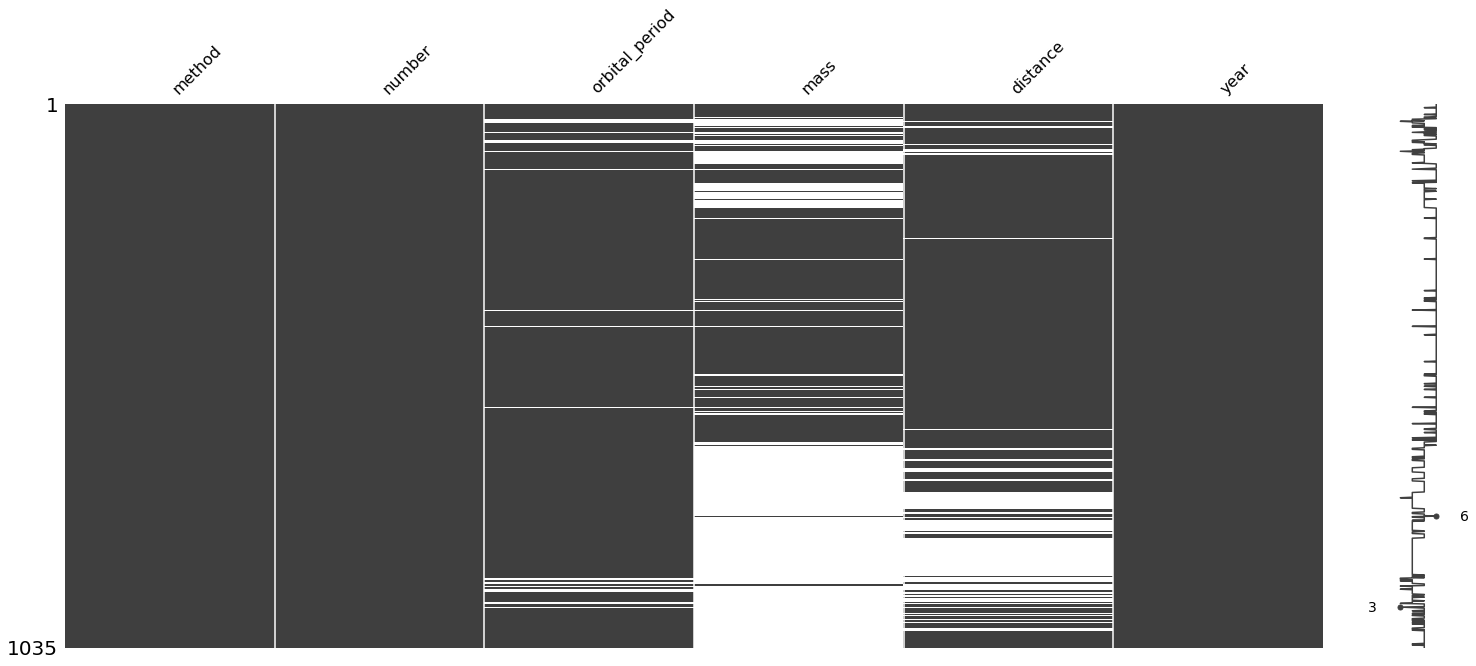

In [48]:
msno.matrix(df_planets);

__YORUM__

Ne zaman orbital_period'da eksiklik olduğunda mass'de de eksiklik gözlemleniyor. Ama mass'de eksiklik varsa orbital_period'da eksiklik yok.

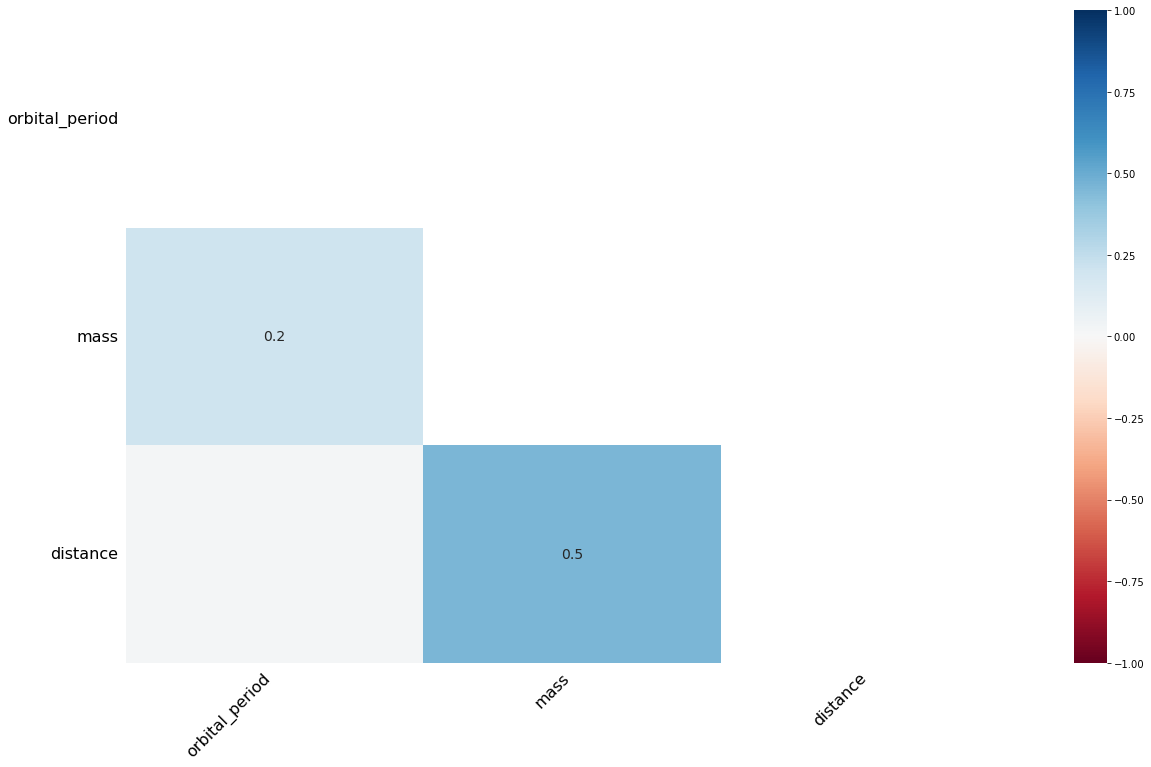

In [49]:
msno.heatmap(df_planets);

Float değerler iki değişken arasındaki korelasyon varsa bağımlılık var.

Eğer değer 0 ise aralarında ilişki yoktur.

"distance" ve "mass" değişkeni arasında 0.5'lik bir korelasyon var.

"orbital_period" değişkeni incelendiğinde diğer değişkenlerle çok büyük bir ilişki görülmese de "mass" değişkeni ile arasında 0.2 gibi bir ilişki var.

"mass" değişkeni ile "distance" değişkeni incelendiğinde yaklaşık olaral %50lik bir yokluk korelasyonu var. Orta şiddetli bir koralasyon bulunmakta

__Aralarında Korelasyon varsa Direkt silme ya da direkt doldurma işlemi "yapılmamalıdır"__